# 7.5~7.6

### 1)문제정의
분할 정복 기법을 사용한 0-1 배낭 채우기 알고리즘

### 2)알고리즘 설명

기반상황과 일반상황의 대한 수식을 만들어 코드로 짠다

### 3)손으로 푼 문제

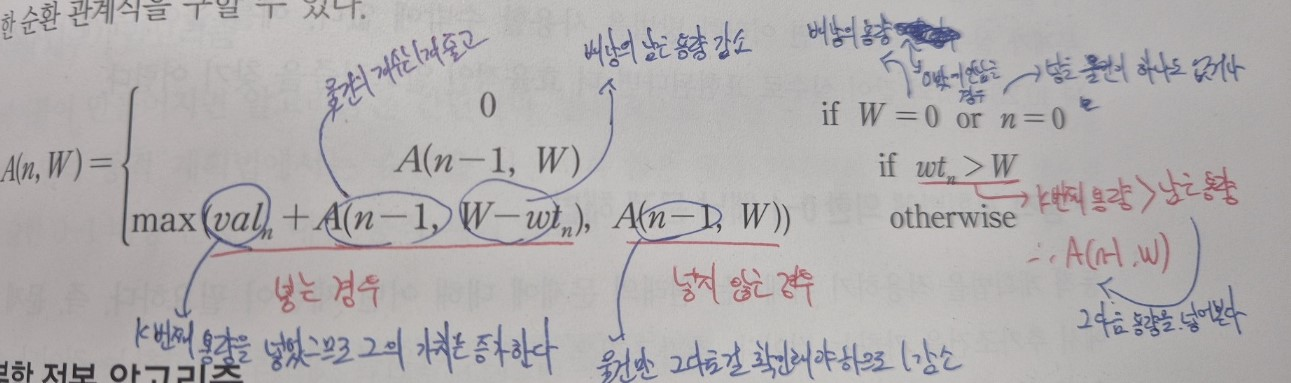

### 4)코드 개요

기반상황인 W=0이거나 N=0일 때 즉, 남은 용량이 0이거나 물건의 개수가 0일 때 무조건 0이라는 값을 리턴하게 만들고
집어넣을 용량이 남은 용량보다 클 땐 그 물건을 SKIP하고 다른 물건을 CHECK하는 부분이 A(N-1,W)이며, 
두 상황을 제외한 평범한 경우, 물건을 집어넣고 그의 가치를 나타내주고 총 용량중에 집어넣은 물건의 중량을 뺀 값과 넣지 않고 물건만 SKIP한 경우의 최대값을 찾아 리턴해주게 되면 결국 최대의 가치로 이루어진 물건들만 가방에 남겨져 있게된다


### 5)알고리즘 코드

In [7]:
def knapSack_dc(W, wt, val, n):
    if n == 0 or W == 0:
        return 0
    
    if (wt[n-1] > W):
        return KnapSack_bf(W,wt,val,n-1)
    
    else:
        valWithout = knapSack_bf(W, wt, val, n-1)
        valWith = val[n-1] + knapSack_bf(W-wt[n-1],wt,val,n-1)
        return max(valWith, valWithout)

### 6)테스트 코드

In [8]:
def knapSack_dc(W, wt, val, n):
    if n == 0 or W == 0:
        return 0

    if wt[n-1] > W:
        return knapSack_dc(W, wt, val, n-1)
    
    else:
        valWithout = knapSack_dc(W, wt, val, n-1)
        
        valWith = val[n-1] + knapSack_dc(W - wt[n-1], wt, val, n-1)
        
        return max(valWith, valWithout)

W = 50  
wt = [10, 20, 30] 
val = [60, 100, 120]  
n = len(wt)  

print(knapSack_dc(W, wt, val, n))


220


### 7)수행 결과

### 8)복잡도 계산
0-1 배낭 문제의 분할 정복 알고리즘은 재귀적으로 모든 가능한 물건의 조합을 탐색하는다   
물건을 배낭에 넣거나 넣지 않는 경우 이를 기반으로 시간 복잡도는 O(2^n)

In [9]:
def knapSack_dp(W, wt, val, n):
    A = [[0 for x in range(W + 1)] for x in range(n+1)]

    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if wt[i-1] > w:
                A[i][w] = A[i-1][w]
            else:
                valWith = val[i-1] + A[i-1][w-wt[i-1]]
                valWith = A[i-1][w]
                A[i][w] = max(valWith, valWithout)

    return A[n][W]
    

### 동적계획법에 의한 0-1배낭 문제 해법

코드 개요는 위와 같다 대신 테이블 설계를 하여 메모리를 쓰고 그로인해 시간 복잡도를 줄이는 방법이다.
테이블 설계는 배낭 용량 즉, 0부터 W까지 물건의 수 인 0~N까지 만든다 이 이유는 모든 경우의 수를 만들기 위해서이다
이렇게 만들게 되면 (W,N)부분이 제일 최댓값으로 나오게 된다
이렇게 코드를 짜게 되면 하나하나씩 순환되어서 리턴값이 나오는 것이 아니라 테이블 셋으로 만들어진 데이터를 가져다 쓰게 되는 것이다

### 5)알고리즘 코드

In [10]:

import copy
def shortest_path_floyd(vertex, W):
    vsize = len(vertex)
    D = copy.deepcopy(W)

    for k in range(vsize):
        for i in range(vsize):
            for j in range(vsize):
                if (D[i][k] + D[k][j] < D[i][j]):
                    D[i][j] = D[i][k] + D[k][j]
    printD(D)


### 6)테스트 코드

In [11]:
def knapSack_dp(W, wt, val, n):
    A = [[0 for x in range(W + 1)] for x in range(n+1)]

    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if wt[i-1] > w:
                A[i][w] = A[i-1][w]
            else:
                valWith = val[i-1] + A[i-1][w-wt[i-1]]
                valWithout = A[i-1][w]
                A[i][w] = max(valWith, valWithout)

    return A[n][W]

W = 50  
wt = [10, 20, 30]  
val = [60, 100, 120] 
n = len(val)  
print("최대 가치:", knapSack_dp(W, wt, val, n))

최대 가치: 220


### 7) 수행 결과

### 8)복잡도 계산
여기서Nn은 물건의 개수이고, W는 배낭의 무게 한도이다. 알고리즘의 각 단계에서는 이중 반복문을 사용하여 모든 물건과 가능한 배낭 무를 계산되며,. 내부 반복문에서는 상수 시간이 소요되므로 시간 복잡도는 ONnW)

# 7.10

### 1)문제정의
Floyd의 최단경로 탐색 알고리즘

### 2)알고리즘 설명
 그래프의 모든 쌍의 최단 경로를 찾기 위한 알고리즘이다. 이 알고리즘은 동적 프로그래밍을 사용하여 그래프의 각 정점 쌍 사이의 최단 경로를 계산한다.

### 3)손으로 푼 문제
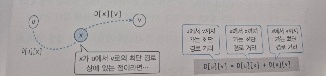

### 4)코드 개요

초기 테이블을 설정하고 연결된 간선은 단순히 그 값을 채워 넣고, 연결되지 않은 간선은 INF이라는 값을 넣는다
또한 자기 자신에서 자기 자신으로 가는 비용은 0이므로 A-A는 0으로 채운다
이렇게 초기 테이블을 설정하고 그에 맞게 테이블을 만든다
코드는 
A을 거쳐 갈 때가 더 빠른 경우가 존재한다면 빠른 경우로 최단 거리를 갱신해주는 식으로 만든 테이블에서 꺼내서 쓰는 방법으로 7.5~7.6처럼 공간을 이용해 시간복잡도를 줄이는 것이다

### 5)알고리즘 코드

In [ ]:
import copy
def shortest_path_floyd(vertex, W):
    vsize = len(vertex)
    D = copy.deepcopy(W)

    for k in range(vsize):
        for i in range(vsize):
            for j in range(vsize):
                if (D[i][k] + D[k][j] < D[i][j]):
                    D[i][j] = D[i][k] + D[k][j]
    printD(D)


### 6)테스트 코드

In [13]:
import copy

def printD(D):
    vsize = len(D)
    print("D matrix:")
    for i in range(vsize):
        for j in range(vsize):
            if D[i][j] == float('inf'):
                print("inf", end=" ")
            else:
                print(f"{D[i][j]:3}", end=" ")
        print()
    print()

def shortest_path_floyd(vertex, W):
    vsize = len(vertex)
    D = copy.deepcopy(W)

    for k in range(vsize):
        for i in range(vsize):
            for j in range(vsize):
                if D[i][k] + D[k][j] < D[i][j]:
                    D[i][j] = D[i][k] + D[k][j]
    printD(D)

def printD(D):
    vsize = len(D)
    print("================================")
    for i in range(vsize):
        for j in range(vsize):
            if(D[i][j] == INF) : print(" INF ", end='')
            else : print("%4d "%D[i][j], end='')
        print("")
INF = 9999
vertex = [ 'A', 'B', 'C', 'D', 'E', 'F', 'G']
weight = [ [ 0, 7, INF, INF, 3, 10, INF ],
           [ 7, 0, 4, 10, 2, 6, INF ],
           [ INF, 4, 0, 2, INF, INF, INF ],
           [ INF, 10, 2, 0, 11, 9, 4 ],
           [ 3, 2, INF, 11, 0, 13, 5 ],
           [ 10, 6, INF, 9, 13, 0, INF ],
           [ INF, INF, INF, 4, 5, INF, 0]]
print("Shortest Path By Floyd's Algorithm")
shortest_path_floyd(vertex, weight)

Shortest Path By Floyd's Algorithm
   0    5    9   11    3   10    8 
   5    0    4    6    2    6    7 
   9    4    0    2    6   10    6 
  11    6    2    0    8    9    4 
   3    2    6    8    0    8    5 
  10    6   10    9    8    0   13 
   8    7    6    4    5   13    0 


### 7)수행 결과

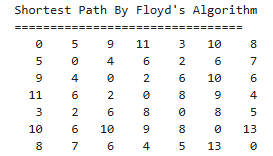

### 8)복잡도 계산
시간 복잡도: O(n^3)
공간 복잡도: O(n^2)